# Time-Series Forecasting FBProphet 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno
%matplotlib inline

# STEP #1: IMPORTING DATA

In [2]:
# !pip install fbprophet

In [3]:
# from fbprophet import Prophet

In [4]:
%%time
chicago_df_1 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)
chicago_df_2 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False)
chicago_df_3 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', error_bad_lines=False)

C:\Users\Perry\anaconda3\lib\site-packages\IPython\core\magics\execution.py:1321: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code, glob, local_ns)
b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


Wall time: 25.3 s


In [5]:
chicago_df_1.shape

(1872343, 23)

In [6]:
chicago_df_2.shape

(2688710, 23)

In [7]:
chicago_df_3.shape

(1456714, 23)

In [8]:
df = pd.concat(objs=[chicago_df_1, chicago_df_2, chicago_df_3], axis=0)
df.shape

(6017767, 23)

In [9]:
1872343 + 2688710 + 1456714

6017767

# STEP #2: EXPLORING THE DATASET  

In [10]:
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


In [11]:
%%time
# plt.figure(figsize=(10,10))
# sns.heatmap(data=df.isna(), cbar = False);

Wall time: 0 ns


In [12]:
%%time
# ID Case Number Date Block IUCR Primary Type Description Location Description Arrest Domestic Beat District Ward Community Area FBI Code X Coordinate Y Coordinate Year Updated On Latitude Longitude Location
df = df.drop(labels=['Unnamed: 0', 'Case Number', 'Case Number', 'IUCR', 'X Coordinate', 'Y Coordinate','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area', 'Location', 'District', 'Latitude' , 'Longitude'], axis=1)

Wall time: 1.81 s


In [13]:
df["Date"] = pd.to_datetime(df["Date"], format='%m/%d/%Y %I:%M:%S %p')

In [14]:
df["Primary Type"].value_counts().iloc[:15]

THEFT                         1245111
BATTERY                       1079178
CRIMINAL DAMAGE                702702
NARCOTICS                      674831
BURGLARY                       369056
OTHER OFFENSE                  368169
ASSAULT                        360244
MOTOR VEHICLE THEFT            271624
ROBBERY                        229467
DECEPTIVE PRACTICE             225180
CRIMINAL TRESPASS              171596
PROSTITUTION                    60735
WEAPONS VIOLATION               60335
PUBLIC PEACE VIOLATION          48403
OFFENSE INVOLVING CHILDREN      40260
Name: Primary Type, dtype: int64

In [15]:
df["Primary Type"].value_counts().iloc[:15].index

Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'BURGLARY',
       'OTHER OFFENSE', 'ASSAULT', 'MOTOR VEHICLE THEFT', 'ROBBERY',
       'DECEPTIVE PRACTICE', 'CRIMINAL TRESPASS', 'PROSTITUTION',
       'WEAPONS VIOLATION', 'PUBLIC PEACE VIOLATION',
       'OFFENSE INVOLVING CHILDREN'],
      dtype='object')

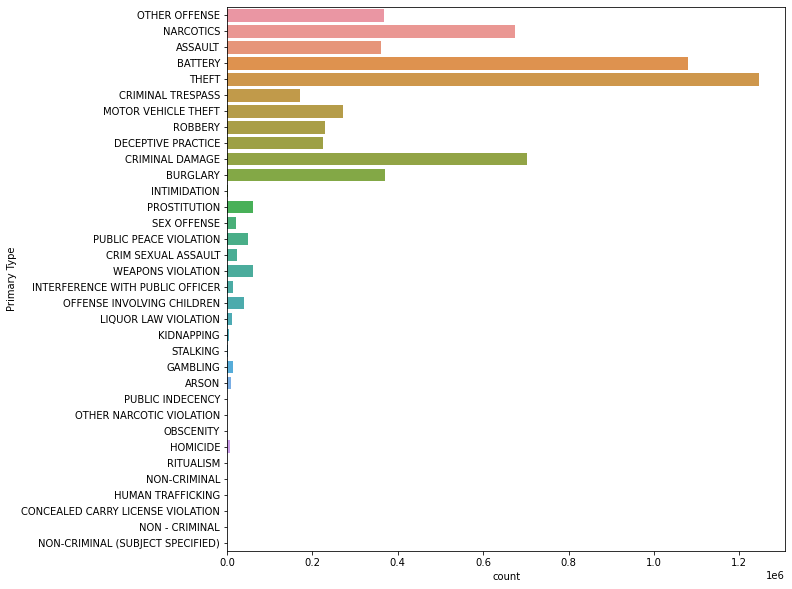

In [16]:
plt.figure(figsize=(10, 10))
sns.countplot(data=df, y="Primary Type");

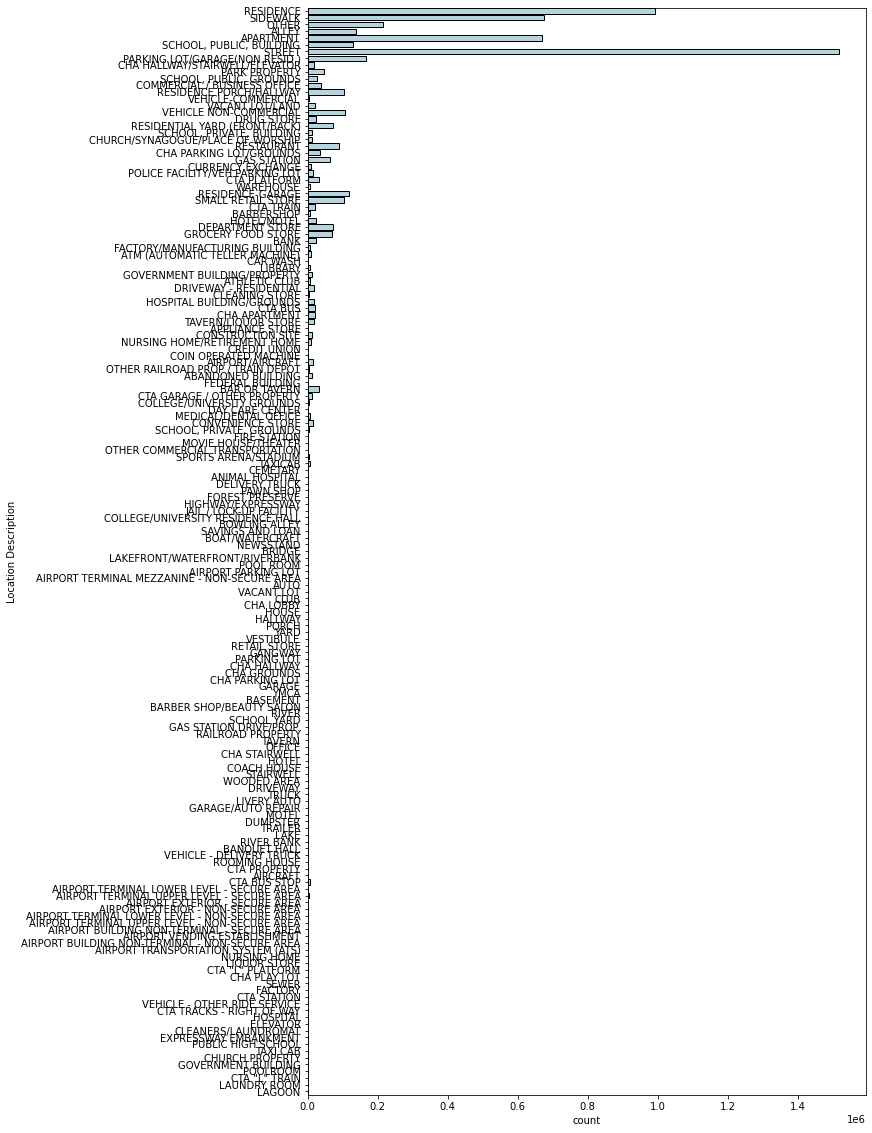

In [17]:
plt.figure(figsize=(10, 20))
sns.countplot(data=df, y="Location Description", color="lightblue", edgecolor="black");

In [18]:
# df.index = pd.DatetimeIndex(data=df["Date"])
df.index = df["Date"]
df.index

DatetimeIndex(['2006-04-02 13:00:00', '2006-02-26 13:40:48',
               '2006-01-08 23:16:00', '2006-04-05 18:45:00',
               '2006-02-17 21:03:14', '2006-03-30 22:30:00',
               '2006-04-05 12:10:00', '2006-04-05 15:00:00',
               '2006-04-05 21:30:00', '2006-04-03 03:00:00',
               ...
               '2016-05-03 23:30:00', '2016-05-03 23:50:00',
               '2016-05-03 22:25:00', '2016-05-03 23:00:00',
               '2016-05-03 23:28:00', '2016-05-03 23:33:00',
               '2016-05-03 23:30:00', '2016-05-03 00:15:00',
               '2016-05-03 21:07:00', '2016-05-03 23:38:00'],
              dtype='datetime64[ns]', name='Date', length=6017767, freq=None)

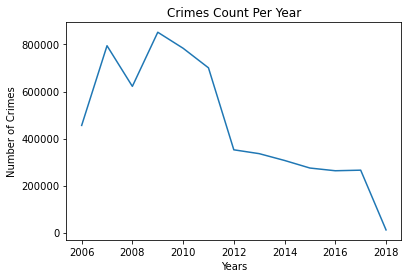

In [19]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html
# Resample is a Convenience method for frequency conversion and resampling of time series.

plt.plot(df.resample(rule='Y').size())
plt.title('Crimes Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes');

Text(0, 0.5, 'Number of Crimes')

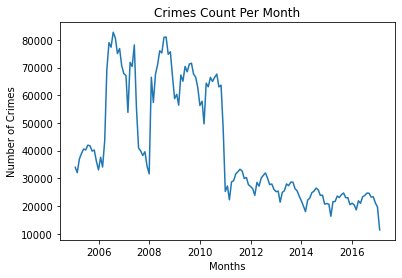

In [20]:
plt.plot(df.resample('M').size())
plt.title('Crimes Count Per Month')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')

# STEP #3: PREPARING THE DATA

In [21]:
df_prophet = df.resample('M').size().reset_index()
df_prophet.columns = ['Date', 'Crime Count']
df_prophet.head()

,Date,Crime Count
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572


In [22]:
# Rename the columns names
df_prophet.rename(mapper={"Date": "ds", "Crime Count": "y"}, axis=1)
# 
df_prophet.rename(columns={"Date": "ds", "Crime Count": "y"})
# 
df_prophet.columns = ["ds", "y"]

In [23]:
df_prophet

,ds,y
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


In [24]:
for row in df.to_dict(orient="records"):
    print(row)
    break

{'ID': 4673626, 'Date': Timestamp('2006-04-02 13:00:00'), 'Block': '055XX N MANGO AVE', 'Primary Type': 'OTHER OFFENSE', 'Description': 'HARASSMENT BY TELEPHONE', 'Location Description': 'RESIDENCE', 'Arrest': False, 'Domestic': False}


# STEP #4: MAKE PREDICTIONS

In [25]:
from fbprophet import Prophet

model = Prophet()
model.fit(df_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [26]:
# Forcasting into the future
future = model.make_future_dataframe(periods=730)
forecast = model.predict(future)

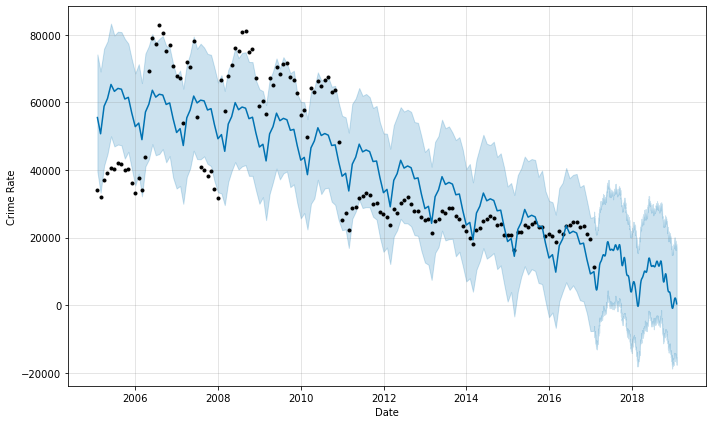

In [27]:
figure = model.plot(forecast, xlabel='Date', ylabel='Crime Rate')

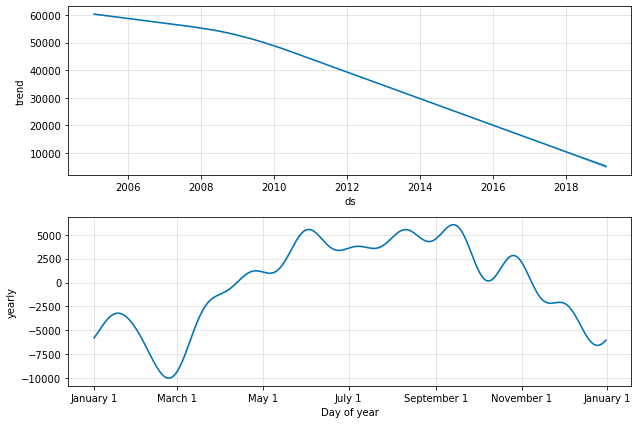

In [28]:
figure = model.plot_components(forecast)

---